In [1]:
import jsonpickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open("results_3000_2021-04-26.json", "r") as file:
    contents = file.read()
    unfrozen = jsonpickle.decode(contents)

df = pd.DataFrame(unfrozen)
cols = list(df.columns)

In [2]:
# for item in unfrozen:
#     item["weights"] = tuple(item["weights"])


# with open(f"new_results_3000_2021-04-26.json", "w") as file:
#     frozen = jsonpickle.encode(unfrozen)
#     file.write(frozen)



# df.value_counts(["array", "weights"])
# df["array"]

# test = (0, 3, 4, 6, 1, 2, 5, 8, 7)
# output = df['array'] == test
# df[output]

# errors: 15975 - 15999
    


## Group items
Group items by depth (= how many steps were required to finish the puzzle), show the distribution of depths as chart

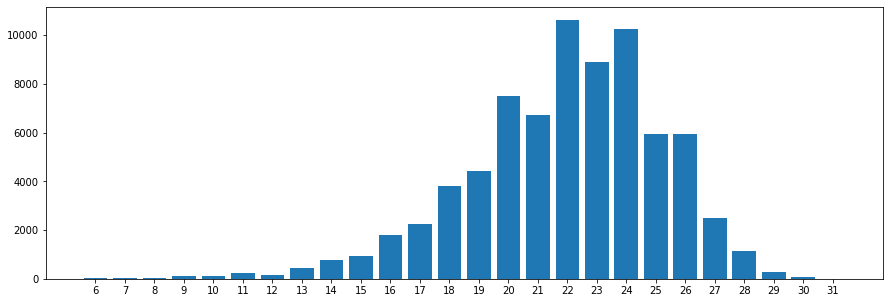

In [3]:
group = df.groupby(['depth'])
x_pos = [i for i, _ in enumerate(group)]
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(list(group.groups.keys()))
ax.bar(list(group.groups.keys()), list(group.size()))
plt.show()

## Printing a single constellation

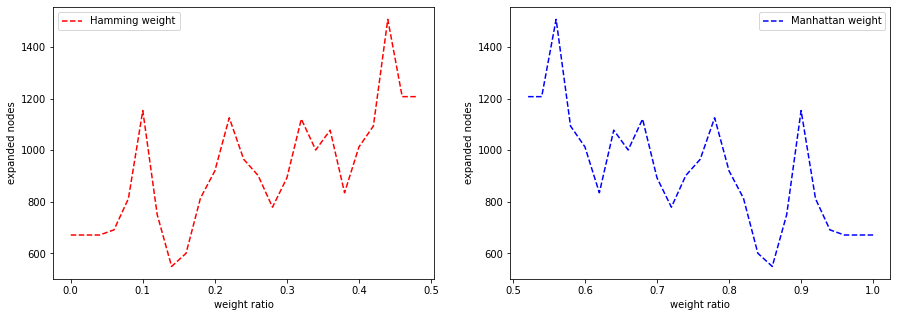

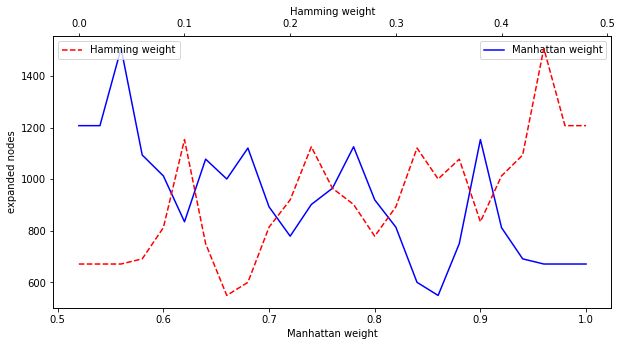

In [4]:
x1 = np.array(df[0:25]['weights'].tolist())[:,0]
y = df[0:25]['expanded_nodes']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(x1,y, "b--", label="Manhattan weight")
ax[1].set_xlabel("weight ratio")
ax[1].set_ylabel("expanded nodes")
ax[1].legend()

x2 = np.array(df[0:25]['weights'].tolist())[:,1]
y = df[0:25]['expanded_nodes']
ax[0].plot(x2,y, "r--", label="Hamming weight")
ax[0].set_xlabel("weight ratio")
ax[0].set_ylabel("expanded nodes")
ax[0].legend()

plt.show()

############## COMBINED

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twiny()

ax1.plot(x1,y, "b", label="Manhattan weight")
ax1.set_xlabel("Manhattan weight")
ax1.set_ylabel("expanded nodes")
ax1.legend()

ax2.plot(x2,y, "r--", label="Hamming weight")
ax2.set_xlabel("Hamming weight")
ax2.set_ylabel("expanded nodes")
ax2.legend()

plt.show()


## Print constellation for all (average)

Shows the average expanded nodes based on the weight

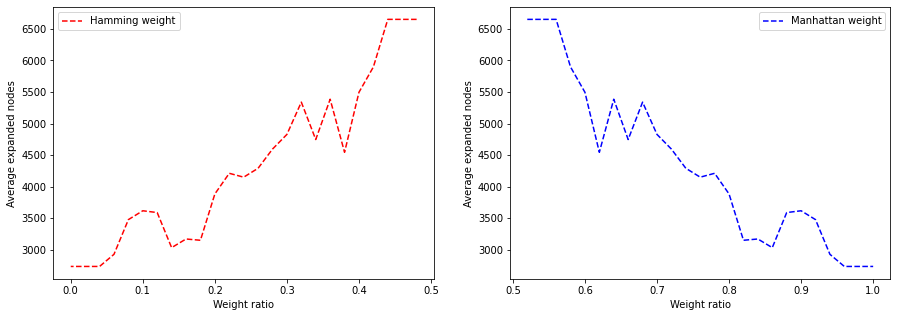

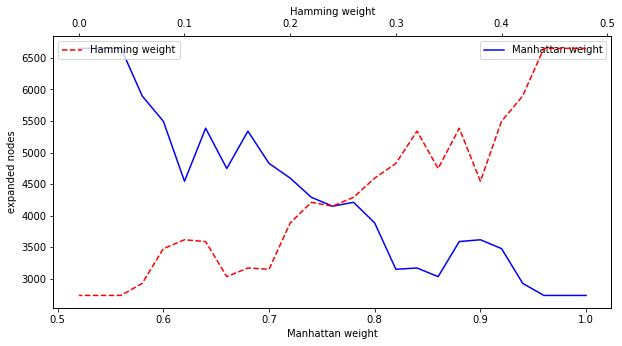

In [5]:
weight_group = df.groupby(['weights'])
x1 = np.array(list(weight_group.groups.keys()))[:,0]
x2 = np.array(list(weight_group.groups.keys()))[:,1]
y = weight_group['expanded_nodes'].mean()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[1].plot(x1, y, "b--", label="Manhattan weight") 
ax[1].set_xlabel("Weight ratio")
ax[1].set_ylabel("Average expanded nodes")
ax[1].legend()

ax[0].plot(x2, y, "r--",label = "Hamming weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()
plt.show()

###################### COMBINED

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twiny()

ax1.plot(x1,y, "b", label="Manhattan weight")
ax1.set_xlabel("Manhattan weight")
ax1.set_ylabel("expanded nodes")
ax1.legend()

ax2.plot(x2,y, "r--", label="Hamming weight")
ax2.set_xlabel("Hamming weight")
ax2.set_ylabel("expanded nodes")
ax2.legend()

plt.show()


In [6]:
df = pd.DataFrame(unfrozen)

## Min Nodes

In [7]:
min_value = group[['expanded_nodes']].min()
min_value

,expanded_nodes
depth,
6,15
7,19
8,17
9,24
10,19
11,39
12,43
13,36
14,47


## Max Nodes

In [8]:
min_value = group[['expanded_nodes']].max()
min_value

,expanded_nodes
depth,
6,20
7,32
8,20
9,59
10,112
11,127
12,212
13,277
14,359


## Mean Nodes

In [9]:
mean_value = group[['expanded_nodes']].mean()
print(mean_value)

       expanded_nodes
depth                
6           16.920000
7           26.080000
8           17.680000
9           35.380000
10          49.448000
11          76.700000
12          87.553333
13         129.973995
14         156.038710
15         233.152432
16         344.604004
17         453.744093
18         625.308463
19         948.100816
20        1274.578059
21        1895.977503
22        2515.098598
23        3949.819558
24        5186.574868
25        7666.588225
26       10354.294157
27       15194.388150
28       20920.390351
29       28293.810811
30       34229.982143
31       37723.500000


## Best weights based on the least nodes per depth

In [10]:
min_nodes = df.loc[group['expanded_nodes'].idxmin()]
np.mean(min_nodes['weights'].tolist(), axis=0)

array([0.92923077, 0.07076923])

## Best weights based on the weights with the least nodes of each example

In [11]:
group_by_example = df.groupby('array')
min_nodes_per_example = df.loc[group_by_example['expanded_nodes'].idxmin()]
np.mean(min_nodes_per_example['weights'].tolist(), axis=0)

array([0.89608667, 0.10391333])

In [12]:
min_nodes_per_example.sort_values("depth")

,array,weights,expanded_nodes,time_elapsed,depth
1359,"(0, 1, 2, 3, 6, 5, 7, 4, 8)","(0.8199999999999998, 0.18)",15,0.000000,6
31922,"(3, 1, 2, 6, 5, 8, 7, 0, 4)","(0.5599999999999996, 0.44)",19,0.000000,7
40500,"(3, 2, 5, 6, 1, 8, 7, 4, 0)","(1.0, 0.0)",17,0.000000,8
52307,"(3, 2, 5, 0, 1, 8, 4, 6, 7)","(0.8599999999999999, 0.14)",24,0.000000,9
56369,"(1, 4, 2, 5, 8, 0, 3, 6, 7)","(0.6199999999999997, 0.38)",27,0.015624,9
...,...,...,...,...,...
33950,"(7, 0, 6, 5, 8, 1, 2, 4, 3)","(1.0, 0.0)",8906,10.263208,29
27282,"(8, 0, 6, 4, 1, 5, 2, 7, 3)","(0.8599999999999999, 0.14)",10388,13.411875,29
56178,"(8, 5, 4, 7, 3, 2, 6, 0, 1)","(0.94, 0.06)",24305,86.314605,29
64475,"(7, 8, 0, 1, 6, 5, 2, 4, 3)","(1.0, 0.0)",19447,45.564359,30


[0.56 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 1.  ]
weights
(0.5599999999999996, 0.44)      2.714286
(0.5999999999999996, 0.4)      13.033333
(0.6199999999999997, 0.38)     27.049287
(0.6399999999999997, 0.36)    118.227273
(0.6599999999999997, 0.34)     44.961078
(0.6799999999999997, 0.32)     92.003241
(0.6999999999999997, 0.3)     107.647570
(0.7199999999999998, 0.28)    167.523297
(0.7399999999999998, 0.26)    115.745306
(0.7599999999999998, 0.24)     66.954070
(0.7799999999999998, 0.22)    109.636015
(0.7999999999999998, 0.2)      88.964120
(0.8199999999999998, 0.18)     86.504945
(0.8399999999999999, 0.16)     96.095632
(0.8599999999999999, 0.14)    109.492171
(0.8799999999999999, 0.12)     84.698620
(0.8999999999999999, 0.1)      85.496627
(0.9199999999999999, 0.08)     73.189407
(0.94, 0.06)                  106.885940
(1.0, 0.0)                    103.660679
Name: normalized_expanded_nodes, dtype: float64


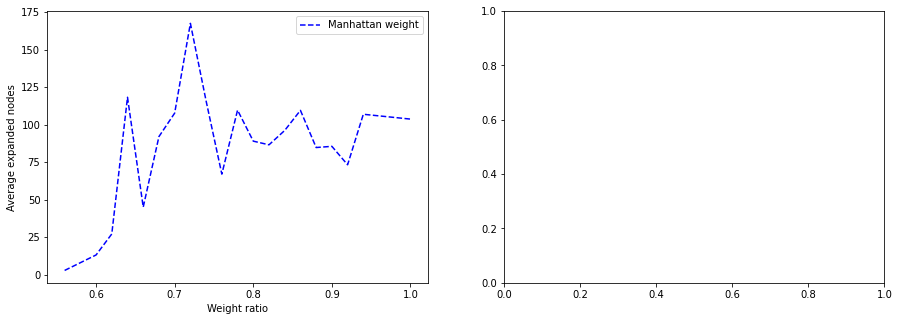

In [13]:
min_nodes_per_example['normalized_expanded_nodes'] = min_nodes_per_example['expanded_nodes'] / min_nodes_per_example['depth']
weight_group = min_nodes_per_example.groupby(['weights'])

x1 = np.array(list(weight_group.groups.keys()))[:,0]
x2 = np.array(list(weight_group.groups.keys()))[:,1]
weight_group['normalized_expanded_nodes']
y = weight_group['normalized_expanded_nodes'].mean()

print(x1)
print(y)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x1, y, "b--", label="Manhattan weight") 
ax[0].set_xlabel("Weight ratio")
ax[0].set_ylabel("Average expanded nodes")
ax[0].legend()

# ax[1].plot(x2, y, "r--",label = "Hamming weight") 
# ax[1].set_xlabel("Weight ratio")
# ax[1].set_ylabel("Average expanded nodes")
# ax[1].legend()
plt.show()

# ###################### COMBINED

# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot()
# ax2 = ax1.twiny()

# ax1.plot(x1,y, "b", label="Manhattan weight")
# ax1.set_xlabel("Manhattan weight")
# ax1.set_ylabel("expanded nodes")
# ax1.legend()

# ax2.plot(x2,y, "r--", label="Hamming weight")
# ax2.set_xlabel("Hamming weight")
# ax2.set_ylabel("expanded nodes")
# ax2.legend()

# plt.show()
